In [1]:
import pandas as pd
df = pd.read_csv('../../data.csv', parse_dates=['arrival_planned_time', 'departure_planned_time'])
df.head()

,station,train_name,final_destination_station,delay_in_min,arrival_planned_time,arrival_time_delta_in_min,departure_planned_time,departure_time_delta_in_min,planned_platform,changed_platform,is_canceled,train_type,train_line_ride_id,train_line_station_num,is_endstation,train_path
0,Aachen Hbf,RE 18,Aachen Hbf,6.0,2024-05-10 00:45:00,6.0,NaT,0.0,1,1,False,RE,-5376151638251295800-2405092354,9,True,Maastricht|Meerssen|Valkenburg(NL)|Heerlen|Lan...
1,Aachen Hbf,RB 33,Aachen Hbf,0.0,2024-05-10 00:27:00,0.0,NaT,0.0,2,6,False,RB,3877311608492123870-2405092216,31,True,Essen Hbf|Essen West|Mülheim(Ruhr)Hbf|Mülheim(...
2,Aachen Hbf,RE 18,Heerlen,0.0,NaT,0.0,2024-05-10 00:17:00,0.0,6,NaN,False,RE,349781417030375472-2405100017,1,False,Aachen Hbf|Aachen West|Herzogenrath|Eygelshove...
3,Aachen Hbf,RE 4,Aachen Hbf,6.0,2024-05-10 00:37:00,6.0,NaT,0.0,6,NaN,False,RE,-2351366154733574977-2405092209,24,True,Dortmund Hbf|Witten Hbf|Wetter(Ruhr)|Hagen Hbf...
4,Aachen Hbf,RE 9,Aachen Hbf,17.0,2024-05-10 00:41:00,17.0,NaT,0.0,3,9,False,RE,-1701587498056121817-2405092210,20,True,Siegen Hbf|Brachbach|Kirchen|Betzdorf(Sieg)|Wi...


## get "normal" train planed path

In [2]:
df['train_name_final_destination_station'] = df.apply(lambda row: f"{row['train_name']} -> {row['final_destination_station']}", axis=1)

In [3]:
df.groupby("train_name_final_destination_station", sort=True).size()[3300:3350]

train_name_final_destination_station
RE 2 -> Donaueschingen                  7
RE 2 -> Duisburg Hbf                    4
RE 2 -> Dülmen                          2
RE 2 -> Düsseldorf Hbf               3846
RE 2 -> Eichenberg                     29
RE 2 -> Erfurt Hbf                    413
RE 2 -> Essen Hbf                      63
RE 2 -> Flughafen BER                  58
RE 2 -> Frankfurt(Main)Hbf            810
RE 2 -> Freiburg(Breisgau) Hbf         38
RE 2 -> Haltern am See                 26
RE 2 -> Hausach                         7
RE 2 -> Heidelberg Hbf                 19
RE 2 -> Hof Hbf                        32
RE 2 -> Hornberg(Schwarzw)              5
RE 2 -> Karlsruhe Hbf                1367
RE 2 -> Kassel-Wilhelmshöhe           405
RE 2 -> Koblenz Hbf                   864
RE 2 -> Konstanz                     1219
RE 2 -> Köfering                        2
RE 2 -> Königs Wusterhausen           138
RE 2 -> Mainz Hbf                     114
RE 2 -> Marl-Sinsen                    

In [4]:
grouped = df.groupby(["train_name_final_destination_station", "train_path"]).agg(
    count_samples=('station', 'size'),
).reset_index()

grouped[grouped["train_name_final_destination_station"] == "RE 1 -> Dortmund Hbf"]

,train_name_final_destination_station,train_path,count_samples
6721,RE 1 -> Dortmund Hbf,Aachen Hbf|Aachen-Rothe Erde|Stolberg(Rheinl)H...,87
6722,RE 1 -> Dortmund Hbf,Aachen Hbf|Aachen-Rothe Erde|Stolberg(Rheinl)H...,81
6723,RE 1 -> Dortmund Hbf,Düsseldorf Hbf|Düsseldorf Flughafen|Duisburg H...,114


In [5]:
grouped.iloc[3025]["train_path"]

'Basel SBB|Basel Bad Bf|Freiburg(Breisgau) Hbf|Offenburg|Karlsruhe Hbf|Mannheim Hbf|Frankfurt(M) Flughafen Fernbf|Köln Hbf|Düsseldorf Hbf|Duisburg Hbf|Essen Hbf|Bochum Hbf|Dortmund Hbf|Münster(Westf)Hbf|Osnabrück Hbf|Bremen Hbf|Hamburg-Harburg|Hamburg Hbf|Hamburg Dammtor|Hamburg-Altona'

In [6]:
grouped.iloc[3024]["train_path"]

'Basel SBB|Basel Bad Bf|Freiburg(Breisgau) Hbf|Offenburg|Baden-Baden|Karlsruhe Hbf|Mannheim Hbf|Frankfurt(M) Flughafen Fernbf|Köln Hbf|Solingen Hbf|Dortmund Hbf|Münster(Westf)Hbf|Osnabrück Hbf|Bremen Hbf|Hamburg-Harburg|Hamburg Hbf|Hamburg Dammtor|Hamburg-Altona'

## delay for train line and station

In [2]:
df['train_name_final_destination_station'] = df.apply(lambda row: f"{row['train_name']} -> {row['final_destination_station']}", axis=1)
df['station_and_station_num'] = df.apply(lambda row: f"{row['train_line_station_num']} | {row['station']}", axis=1)
len(df['train_name_final_destination_station'].unique())

4746

In [3]:
df_re = df[df["train_type"] == "RE"]

In [4]:
df_re['train_name_final_destination_station'].unique()

array(['RE 18 -> Aachen Hbf', 'RE 18 -> Heerlen', 'RE 4 -> Aachen Hbf',
       'RE 9 -> Aachen Hbf', 'RE 1 -> Aachen Hbf',
       'RE 4 -> Düsseldorf Flughafen Terminal', 'RE 1 -> Hamm(Westf)Hbf',
       'RE 4 -> Dortmund Hbf', 'RE 9 -> Siegen Hbf',
       'RE 29 -> Hergenrath', 'RE 18 -> Maastricht',
       'RE 29 -> Aachen Hbf', 'RE 1 -> Düsseldorf Hbf',
       'RE 1 -> Geilenkirchen', 'RE 1 -> Köln Messe/Deutz',
       'RE 54 -> Gemünden(Main)', 'RE 55 -> Aschaffenburg Hbf',
       'RE 54 -> Aschaffenburg Hbf', 'RE 55 -> Frankfurt(Main)Hbf',
       'RE 55 -> Würzburg Hbf', 'RE 87 -> Crailsheim', 'RE 55 -> Bamberg',
       'RE 54 -> Bamberg', 'RE 54 -> Frankfurt(Main)Hbf',
       'RE 54 -> Würzburg Hbf', 'RE 87 -> Aschaffenburg Hbf',
       'RE 71 -> Augsburg Hbf', 'RE 9 -> Augsburg Hbf',
       'RE 89 -> Aalen Hbf', 'RE 79 -> Augsburg Hbf',
       'RE 71 -> Memmingen', 'RE 16 -> Nürnberg Hbf',
       'RE 80 -> Treuchtlingen', 'RE 9 -> München Hbf',
       'RE 16 -> Augsburg Hbf', 'R

In [5]:
grouped = df_re.groupby(['train_name_final_destination_station', 'train_path']).agg(
    mean_delay=('delay_in_min', 'mean'),
    mean_is_canceled=('is_canceled', 'mean'),
    count_samples=('station', 'size'),
).reset_index()
grouped.iloc[100:]

,train_name_final_destination_station,train_path,mean_delay,mean_is_canceled,count_samples
100,RE 1 -> Frankfurt(Oder),Brandenburg Hbf|Werder(Havel)|Potsdam Hbf|Berl...,1.546429,0.000000,280
101,RE 1 -> Frankfurt(Oder),Cottbus Hbf|Guben|Eisenhüttenstadt|Frankfurt(O...,2.486842,0.000000,76
102,RE 1 -> Frankfurt(Oder),Eisenhüttenstadt|Frankfurt(Oder),2.071429,0.000000,28
103,RE 1 -> Frankfurt(Oder),Erkner|Fangschleuse|Fürstenwalde(Spree)|Frankf...,1.991935,0.016129,124
104,RE 1 -> Frankfurt(Oder),Erkner|Fürstenwalde(Spree)|Frankfurt(Oder),0.666667,0.000000,33
...,...,...,...,...,...
3100,RE EX -> Wissembourg,Mainz Hbf|Nierstein|Worms Hbf|Frankenthal Hbf|...,11.250000,0.166667,24
3101,RE RB67 -> Heidelberg Hbf,Mannheim Hbf|Heidelberg Hbf,40.833333,0.666667,6
3102,RE S4 -> Ansbach,Nürnberg Hbf|Nürnberg-Stein|Roßtal|Heilsbronn|...,2.157895,0.000000,19
3103,RE WX -> Koblenz Hbf,Wissembourg|Schweighofen|Kapsweyer|Steinfeld(P...,17.583333,0.250000,12


In [6]:
grouped.index[23]

23


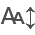

In [7]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [16]:
#grouped[grouped["train_name_final_destination_station"] == "RE 1 -> Hannover Hbf"]
re1 = grouped[grouped["train_name_final_destination_station"].str.startswith("RE 1 ->")]
#
#re1[re1[]]
re1_filtered = re1[re1["count_samples"]>100]
#re1
re1_list = list(re1["train_path"])
re1_filtered_list = list(re1_filtered["train_path"])
paths = re1_filtered_list

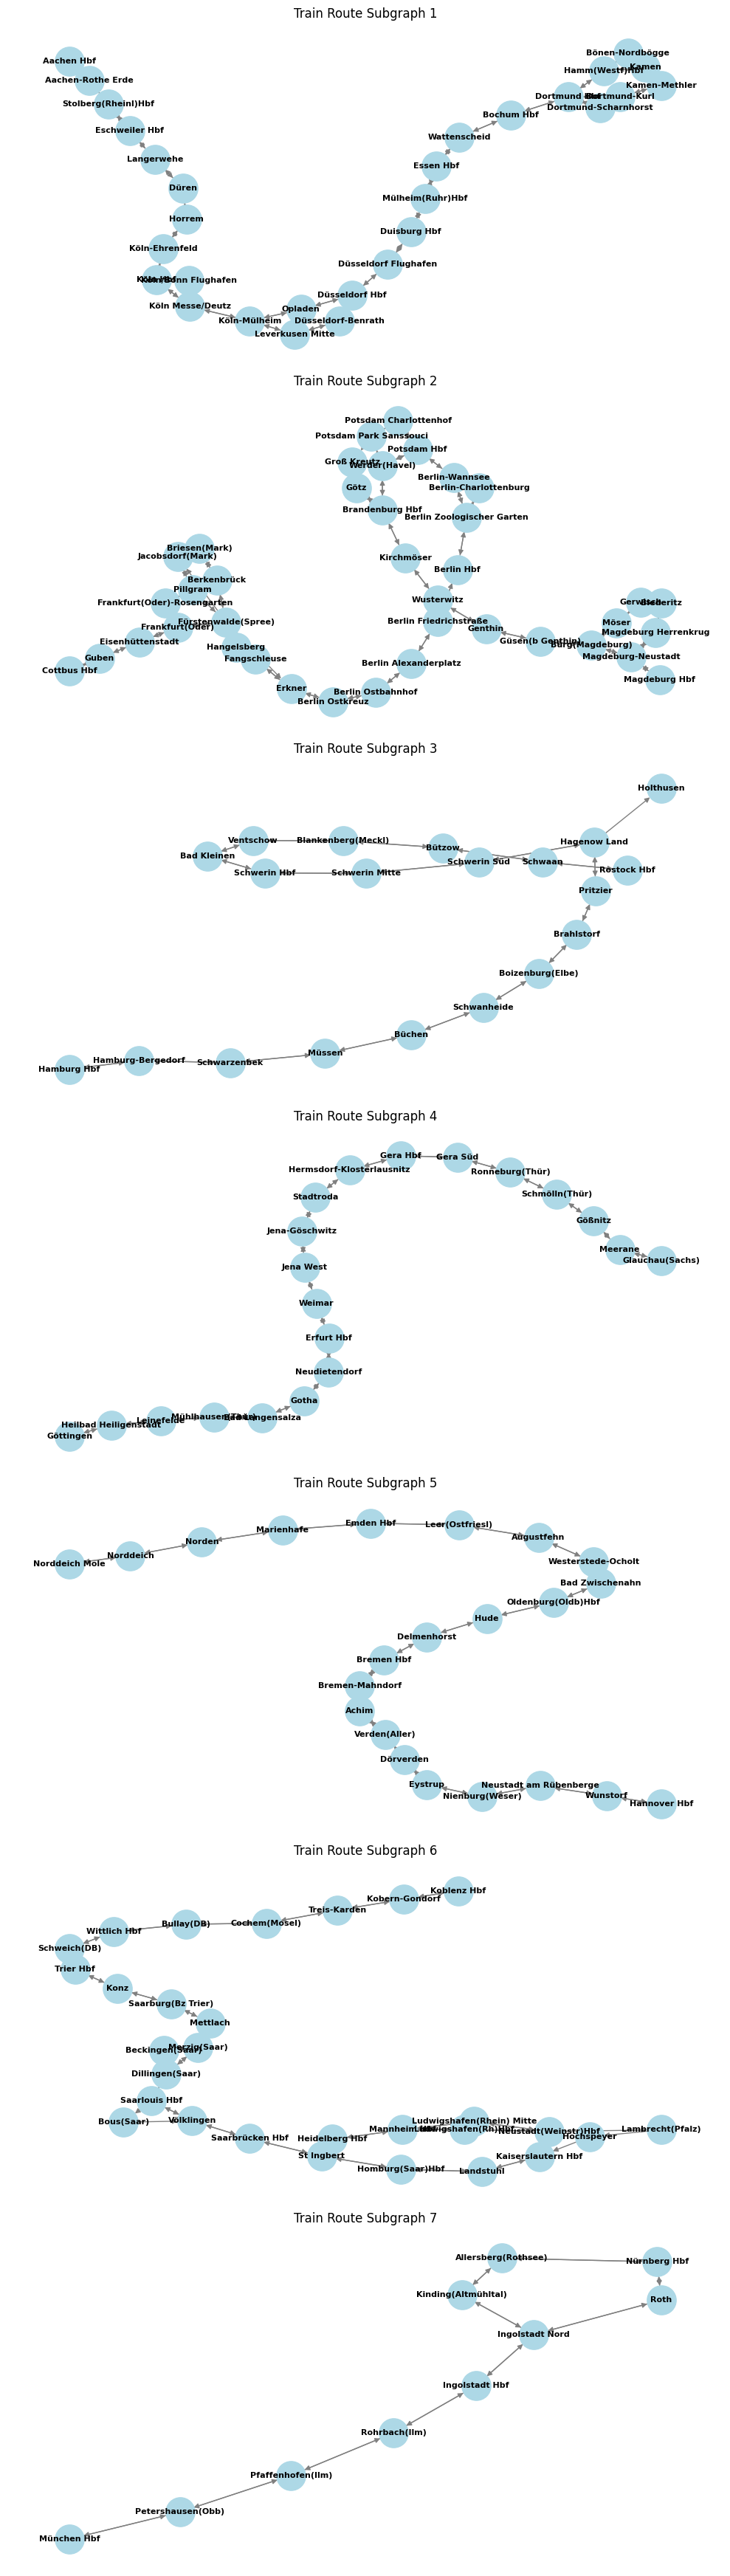

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph and add edges
G = nx.DiGraph()
for path in paths:
    stations = path.split('|')
    for i in range(len(stations) - 1):
        G.add_edge(stations[i], stations[i+1])

components = list(nx.weakly_connected_components(G))
fig, axes = plt.subplots(nrows=len(components), figsize=(15, 5 * len(components)))
if len(components) == 1:
    axes = [axes]

for i, component in enumerate(components):
    subgraph = G.subgraph(component)
    # Select a layout
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, ax=axes[i], with_labels=True, node_color='lightblue', font_size=8, node_size=800, font_weight='bold', edge_color='gray')
    axes[i].set_title(f'Train Route Subgraph {i+1}')

plt.tight_layout()
plt.show()


In [10]:
# I want to make a histogramm for each group where x is axis is the "departure_planned_time" as hourse and y-axis is the avg 

In [11]:
import plotly.graph_objects as go
import networkx as nx

G = nx.DiGraph()
for path in paths:
    stations = path.split('|')
    for i in range(len(stations) - 1):
        G.add_edge(stations[i], stations[i+1])

pos = nx.spring_layout(G)  # positions for all nodes

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(showscale=True, colorscale='YlGnBu', size=10, color=[], line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                 title='<br>Network graph made with Python',
                 titlefont_size=16,
                 showlegend=False,
                 hovermode='closest',
                 margin=dict(b=20,l=5,r=5,t=40),
                 annotations=[ dict(
                     text="Python code powered by Plotly",
                     showarrow=False,
                     xref="paper", yref="paper",
                     x=0.005, y=-0.002 ) ],
                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                 )
fig.show()


In [12]:
import plotly.graph_objects as go
import networkx as nx

# Sample data
paths = [
    'Node1|Node2|Node3|Node4|Node5',
    'Node6|Node7|Node8|Node9|Node10'
]

# Create the graph
G = nx.DiGraph()
for path in paths:
    nodes = path.split('|')
    for i in range(len(nodes) - 1):
        G.add_edge(nodes[i], nodes[i+1])

# Find connected components
components = list(nx.weakly_connected_components(G))

# Prepare to plot
edge_trace = []
node_trace_x = []
node_trace_y = []
node_text = []

# Plot each component
for index, component in enumerate(components):
    subgraph = G.subgraph(component)
    sorted_nodes = list(subgraph.nodes())

    # Position nodes along a line
    pos = {node: (i, 0 if i % 2 == 0 else 1) for i, node in enumerate(sorted_nodes)}

    # Edges
    for edge in subgraph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace.append(go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None],
            line=dict(width=2, color='black'),
            hoverinfo='none',
            mode='lines'))

    # Nodes
    for node, (x, y) in pos.items():
        node_trace_x.append(x)
        node_trace_y.append(y)
        node_text.append(node)

# Node trace
node_trace = go.Scatter(
    x=node_trace_x, y=node_trace_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition="top center",
    marker=dict(showscale=False, color='blue', size=10, line_width=2)
)

# Create figure
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='<br>Network graph with straight-line subgraphs',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
                    height=600
                    )
                )

fig.show()
